In [ ]:
import pandas as pd
URL = "https://raw.githubusercontent.com/DS4PS/pe4ps-textbook/master/data/RegDisc2.csv"
df = pd.read_csv(URL)
df.head()

,agecell,all,alcohol,homicide,suicide,mva,drugs,externalother
0,19.068493,92.825401,0.639138,16.316818,11.203714,35.829327,3.872425,8.534373
1,19.150684,95.100739,0.677409,16.859964,12.193368,35.639256,3.236511,8.655786
2,19.232876,92.144295,0.866443,15.219254,11.715812,34.205650,3.202071,8.513741
3,19.315069,88.427757,0.867308,16.742825,11.275010,32.278957,3.280689,8.258285
4,19.397261,88.704941,1.019163,14.947726,10.984314,32.650967,3.548198,8.417533


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from itertools import combinations
import plotnine as p

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file):
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)

def lm_robust(formula, data):
    regression = sm.OLS.from_formula(formula, data = data)
    regression = regression.fit(cov_type="cluster",cov_kwds={"groups":data['id']})
    return regression

lmb_data = read_data("lmb-data.dta")

lmb_data['demvoteshare_c'] = lmb_data['demvoteshare'] - 0.5
lmb_subset = lmb_data[lmb_data.lagdemvoteshare.between(.48, .52)]

lm_1 = lm_robust('score ~ lagdemocrat', data = lmb_subset)
lm_2 = lm_robust('score ~ democrat', data = lmb_subset)
lm_3 = lm_robust('democrat ~ lagdemocrat', data = lmb_subset)
print("Original results based on ADA Scores -- Close Elections Sample")
# Stargazer([lm_1, lm_2, lm_3])

Original results based on ADA Scores -- Close Elections Sample


<ipython-input-2-6b1891123b58>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


In [ ]:
lmb_data.head()

,state,district,incmbncy,demvote,repvote,year,congress,occupanc,name,eq_Dwhip,...,n,lagged,_merge,democrat,lagdemocrat,score,lagscore,id,id2,demvoteshare_c
0,01: Connecticut,1,-1: REPUBLICAN,127802.0,103294.0,1948.0,81.0,0.0,"RIBICOFF,",0.752336,...,1.0,14.760000,3,1.0,0.0,64.339996,14.760000,3.0,1.0,0.053026
1,01: Connecticut,1,-1: REPUBLICAN,127802.0,103294.0,1948.0,81.0,0.0,"RIBICOFF,",0.752336,...,2.0,9.520000,3,1.0,0.0,60.279999,9.520000,4.0,1.0,0.053026
2,01: Connecticut,1,1: DEMOCRAT,134258.0,96251.0,1950.0,82.0,0.0,"RIBICOFF,",0.770270,...,1.0,64.339996,3,1.0,1.0,57.060001,64.339996,5.0,1.0,0.082441
3,01: Connecticut,1,1: DEMOCRAT,134258.0,96251.0,1950.0,82.0,0.0,"RIBICOFF,",0.770270,...,2.0,60.279999,3,1.0,1.0,73.830002,60.279999,6.0,1.0,0.082441
4,01: Connecticut,1,1: DEMOCRAT,148935.0,112526.0,1954.0,84.0,0.0,DODD,0.730769,...,1.0,56.220001,3,1.0,1.0,42.959999,56.220001,7.0,1.0,0.069626


In [ ]:
df = pd.read_csv('uber_replication.csv')
df.head()

,marijuana,dayofweek,uber,eventdate,incidents
0,0,Sat,0,0,1
1,0,Sun,0,1,2
2,0,Mon,0,2,1
3,0,Tue,0,3,0
4,0,Wed,0,4,1


<Axes: >

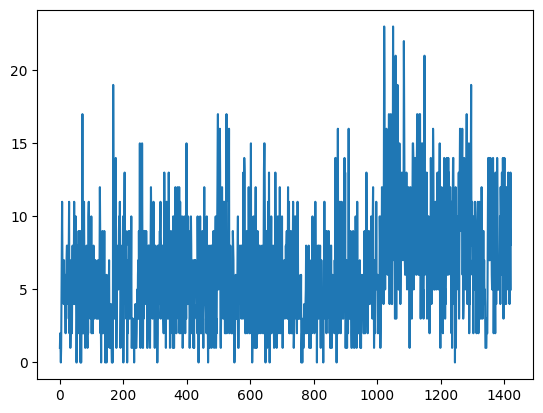

In [ ]:
df.incidents.plot()

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = 'incidents ~ uber + marijuana + C(dayofweek) + eventdate'
wide_window = smf.ols(formula=model, data=df).fit()
wide_window.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              incidents   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     85.03
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          3.50e-126
Time:                        17:48:00   Log-Likelihood:                -3632.0
No. Observations:                1422   AIC:                             7284.
Df Residuals:                    1412   BIC:                             7337.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.5765      0.282     19.763      0.000       5.023       6.130
C(dayofweek)[T.Mon]    -2.5918      0.310     -8.362      0.000      -3.200      -1.984
C(dayofweek)[T.Sat]     2.1619      0.310      6.984      0.000       1.555       2.769
C(dayofweek)[T.Sun]     1.8781      0.310      6.059      0.000       1.270       2.486
C(dayofweek)[T.Thu]    -1.3857      0.310     -4.470      0.000      -1.994      -0.778
C(dayofweek)[T.Tue]    -2.7464      0.310     -8.860      0.000      -3.354      -2.138
C(dayofweek)[T.Wed]    -2.2409      0.310     -7.230      0.000      -2.849      -1.633
uber                   -0.6770      0.334     -2.025      0.043      -1.333      -0.021
marijuana               1.4383      0.361      3.984      0.000       0.730       2.146
eventdate               0.0019      0.001      3.234      0.001       0.001       0.003
==============================================================================
Omnibus:                       55.135   Durbin-Watson:                   1.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.141
Skew:                           0.388   Prob(JB):                     7.95e-17
Kurtosis:                       3.806   Cond. No.                     6.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df[380:400]

,marijuana,dayofweek,uber,eventdate,incidents
380,0,Mon,0,380,7
381,0,Tue,0,381,2
382,0,Wed,0,382,9
383,0,Thu,0,383,5
384,0,Fri,0,384,7
385,0,Sat,0,385,10
386,0,Sun,0,386,9
387,0,Mon,0,387,1
388,0,Tue,0,388,3
389,0,Wed,0,389,6


<Axes: >

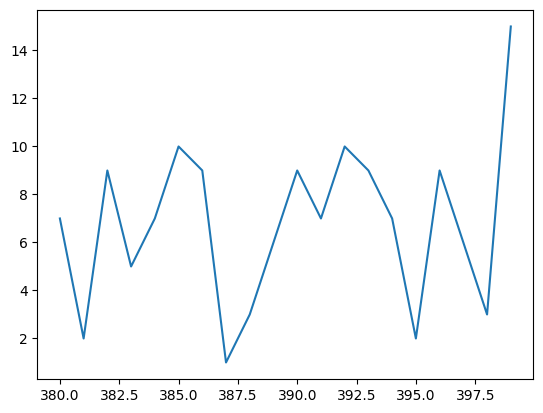

In [ ]:
df[380:400].incidents.plot()

In [ ]:
# try window of 100 days before and after here. Feel free to try other dates
data_window= df.query('390.5 - 100 < eventdate < 390.5 + 100')
other_window = smf.ols(formula=model, data=data_window).fit()
other_window.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              incidents   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     15.68
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           1.16e-17
Time:                        17:49:44   Log-Likelihood:                -457.69
No. Observations:                 200   AIC:                             933.4
Df Residuals:                     191   BIC:                             963.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.0356      2.087      2.891      0.004       1.918      10.153
C(dayofweek)[T.Mon]    -0.9692      0.647     -1.498      0.136      -2.245       0.307
C(dayofweek)[T.Sat]     3.4838      0.641      5.434      0.000       2.219       4.748
C(dayofweek)[T.Sun]     2.6369      0.647      4.076      0.000       1.361       3.913
C(dayofweek)[T.Thu]    -0.5099      0.641     -0.795      0.428      -1.775       0.755
C(dayofweek)[T.Tue]    -2.0753      0.647     -3.208      0.002      -3.352      -0.799
C(dayofweek)[T.Wed]    -0.9247      0.641     -1.442      0.151      -2.190       0.340
uber                   -0.7561      0.691     -1.094      0.275      -2.119       0.607
marijuana                    0          0        nan        nan           0           0
eventdate              -0.0010      0.006     -0.172      0.863      -0.013       0.011
==============================================================================
Omnibus:                        2.669   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.263   Jarque-Bera (JB):                2.777
Skew:                          -0.003   Prob(JB):                        0.249
Kurtosis:                       3.577   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""